<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/sampling/discreteSamplingAndAliasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Sampling and Aliasing
## David Brady
## University of Arizona
## September 2022

## libraries

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})
from google.colab import files
from scipy.special import jn, jn_zeros


## Transfer Functions



  The optical transfer function for 2D imaging is

  \begin{equation}
  {\cal H}(\mu )={2\over \pi}\Re \left ( {\rm arccos}\left (\mu  \lambda f /\# \right )-\left (\mu  \lambda f/\# \right )\sqrt{1-\left (\mu  \lambda f/\# \right )^2}\right )
\end{equation}

The pixel transfer function for square pixels of size $\Delta $ is
\begin{equation}
p(u,v)={\rm sinc}(\Delta u){\rm sinc}(\Delta v)
\end{equation}

In [11]:
def jinc(x):
  # impulse response
  ji=2*jn(1,np.pi*(x+10**(-8)))/(np.pi*(x+10**(-8)))
  return ji
def pupil(x):
  p=1-np.heaviside(np.abs(x)-.5,0)
  return p
def B(u,v,q):
  # bandpass for u,v in units of A, q in units of A^2
  b=(2/(u**2+v**2))*np.real(np.emath.sqrt((u**2+v**2)-(u**2+v**2+2*np.abs(q))**2))
  return b
def H(u):
  # incoherent imaging transfer function for u in units of 1/(lambda f/#)
  h=(2/np.pi)*np.real(np.emath.arccos(u)-u*np.emath.sqrt(1-u**2))
  return h
def p(u,v, delta):
  # pixel transfer function for delta in units of  lambda f/#
  pt=np.sinc(delta*u)*np.sinc(delta*v)
  return pt

## pixel and system transfer function for a circular aperture 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

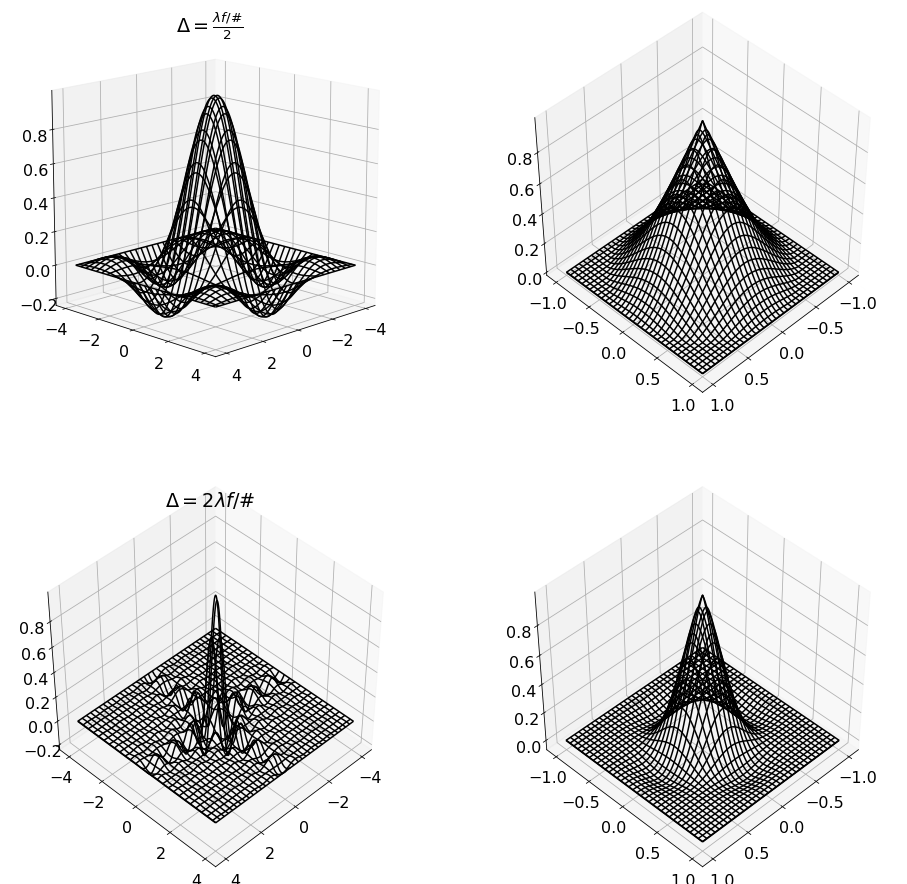

In [ ]:
delta=.5
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(1))
plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams.update({'font.size': 16})
# Creating plot
u = np.linspace(-4, 4, 512)
U, V=np.meshgrid(u,u)
# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.view_init(15, 45)
ax.plot_wireframe(U, V, p(U,V, delta), rstride=20, cstride=20, color='black')
ax.set_title(r'$\Delta=\frac{\lambda f/\#}{2}$')

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(45, 45)
u = np.linspace(-1, 1, 512)
U, V=np.meshgrid(u,u)
# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(U, V, p(U,V, delta)*H(np.sqrt(U**2+V**2)), rstride=15, cstride=15, color='black')

delta=2

# Creating plot
u = np.linspace(-4, 4, 512)
U, V=np.meshgrid(u,u)
# =============
# First subplot
# =============
# set up the axes for the first plot

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.plot_wireframe(U, V, p(U,V, delta), rstride=20, cstride=15, color='black')
ax.set_title(r'$\Delta=2\lambda f/\#$')

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(45, 45)
u = np.linspace(-1, 1, 512)
U, V=np.meshgrid(u,u)
# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(U, V, p(U,V, delta)*H(np.sqrt(U**2+V**2)), rstride=15, cstride=15, color='black')

plt.savefig('stf.pdf')
files.download('stf.pdf')

### cross sections

Text(0.5, 0, '$\\frac{1}{\\lambda f/\\#}$')

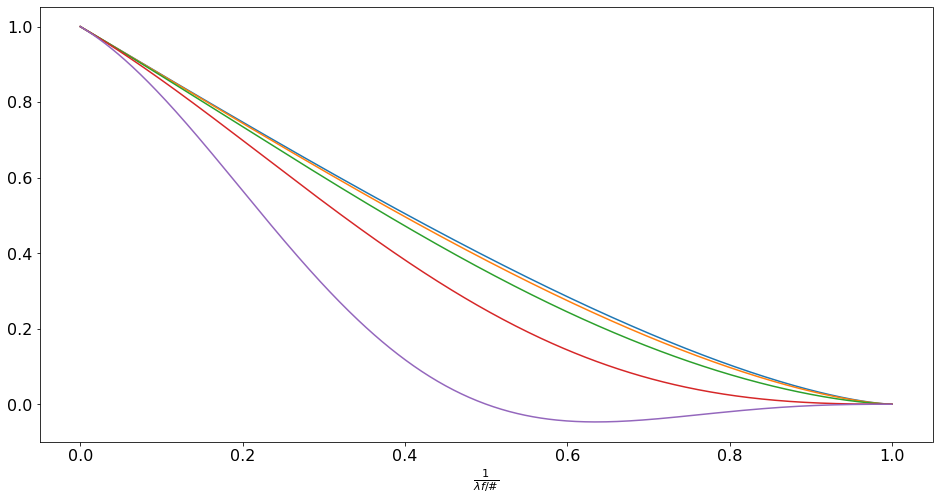

In [ ]:
u = np.linspace(0, 1, 512)
fig = plt.figure(figsize=plt.figaspect(.5))
plt.plot(u, H(u), u,p(u,0,.25)*H(u), u,p(u,0,.5)*H(u), u,p(u,0,1)*H(u), u,p(u,0,2)*H(u))
plt.xlabel(r'$\frac{1}{\lambda f/\#}$')
#plt.savefig('stfvDelta.pdf')
#files.download('stfvDelta.pdf')


Text(0.5, 0, '$\\frac{1}{\\lambda f/\\#}$')

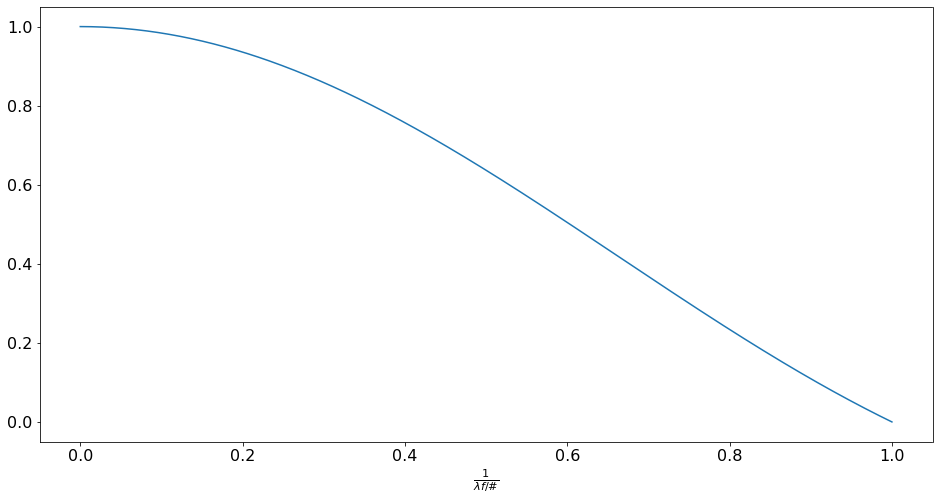

In [ ]:
u = np.linspace(0, 1, 512)
fig = plt.figure(figsize=plt.figaspect(.5))
plt.plot(u,p(u,0,1))
plt.xlabel(r'$\frac{1}{\lambda f/\#}$')
#plt.savefig('stfvDelta.pdf')
#files.download('stfvDelta.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

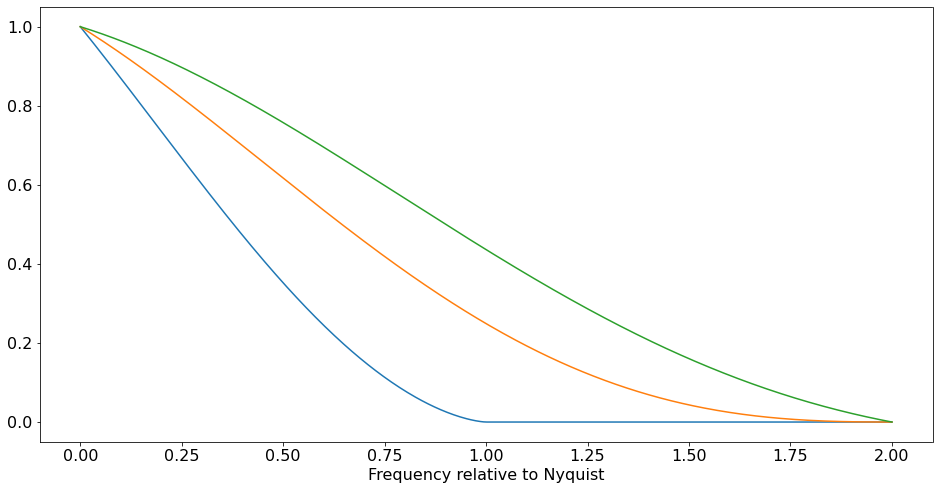

In [ ]:
u = np.linspace(0, 2, 512)
fig = plt.figure(figsize=plt.figaspect(.5))
plt.plot( u,p(u,0,.5)*H(u),u,p(u,0,.5)*H(.5*u), u,p(u,0,.5)*H(.25*u) )
plt.xlabel('Frequency relative to Nyquist')
plt.savefig('stfvNyquist.pdf')
files.download('stfvNyquist.pdf')



# aliasing effects

We consider the signal 
$$f(x)=\cos (2\pi \alpha x^2)$$
we set we set $\alpha= \frac{1}{128(\lambda f/\#)^2}$, which means that at $x=128 \lambda f/\#$ the spatial frequency is approximately $\lambda f/\#$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 288x1152 with 0 Axes>

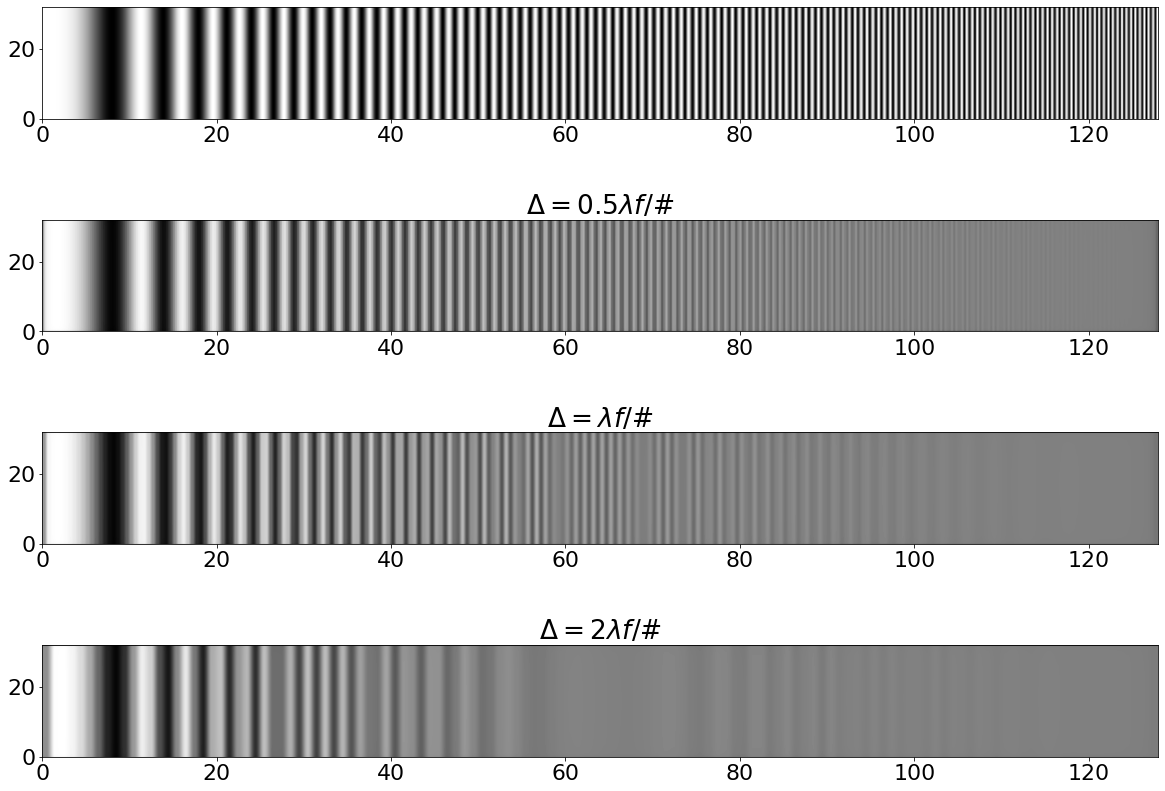

In [7]:
plt.rcParams['figure.figsize'] = [20, 15]
fig = plt.figure(figsize=plt.figaspect(4))
fig, (ax1, ax2, ax3, ax4)= plt.subplots(4,1)
x=128
N=1024
dx=2*x/(N-1)
B=1/(2*dx)
side = np.linspace(0, x, N)
X, Y = np.meshgrid(side, side/4)
u = np.linspace(-B, B, 2*N)
U, V= np.meshgrid(u,u)
# true image
alpha=1./128.
Z = 1 +np.cos(2*np.pi*alpha*X**2)
ax1.imshow(Z, cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
# delta =0.5 
delta=0.5
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*H(np.sqrt(U**2+V**2))*p(U,V, delta)
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax2.imshow(zzFiltered[0:1024:2,0:1024:2], cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
ax2.set_title(r'$\Delta=0.5\lambda f/\#$')
# delta =1
delta=1
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*H(np.sqrt(U**2+V**2))*p(U,V, delta)
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax3.imshow(zzFiltered[0:1024:4,0:1024:4], cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
ax3.set_title(r'$\Delta=\lambda f/\#$')
# delta =2
delta=2
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*H(np.sqrt(U**2+V**2))*p(U,V, delta)
zzFiltered=np.real(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]
ax4.imshow(zzFiltered[0:1024:8,0:1024:8], cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
ax4.set_title(r'$\Delta=2\lambda f/\#$')
plt.savefig('imageSTF.pdf')
files.download('imageSTF.pdf')


## aliasing with Poisson Noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 288x1152 with 0 Axes>

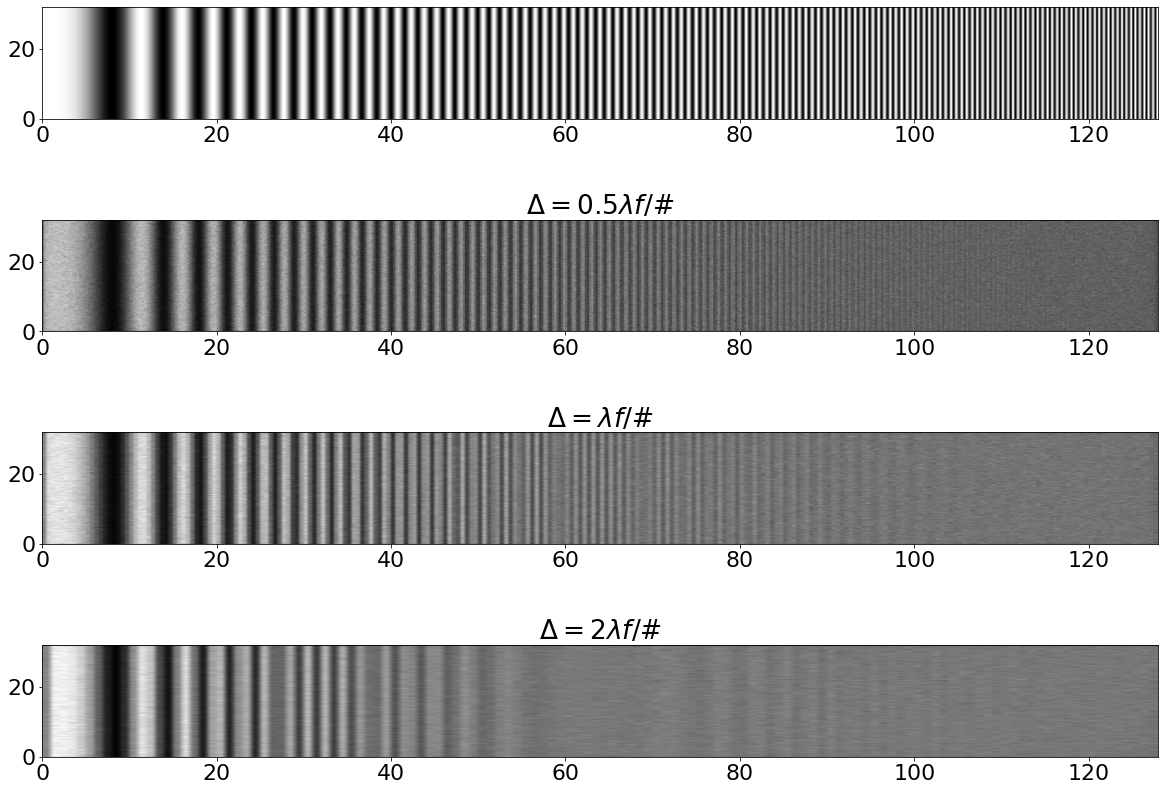

In [19]:
plt.rcParams['figure.figsize'] = [20, 15]
fig = plt.figure(figsize=plt.figaspect(4))
fig, (ax1, ax2, ax3, ax4)= plt.subplots(4,1)
x=128
N=1024
nP=100 # mean photon flux
dx=2*x/(N-1)
B=1/(2*dx)
side = np.linspace(0, x, N)
X, Y = np.meshgrid(side, side/4)
u = np.linspace(-B, B, 2*N)
U, V= np.meshgrid(u,u)
# true image
alpha=1./128.
Z = (1 +np.cos(2*np.pi*alpha*X**2))/2.
ax1.imshow(Z, cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
# delta =0.5 
delta=0.5
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*H(np.sqrt(U**2+V**2))*p(U,V, delta)
zzFiltered=np.random.poisson(nP*np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)])
ax2.imshow(zzFiltered[0:1024:2,0:1024:2], cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
ax2.set_title(r'$\Delta=0.5\lambda f/\#$')
# delta =1
delta=1
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*H(np.sqrt(U**2+V**2))*p(U,V, delta)
zzFiltered=np.random.poisson(4*nP*np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)])
ax3.imshow(zzFiltered[0:1024:4,0:1024:4], cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
ax3.set_title(r'$\Delta=\lambda f/\#$')
# delta =2
delta=2
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*H(np.sqrt(U**2+V**2))*p(U,V, delta)
zzFiltered=np.random.poisson(16*nP*np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)])
ax4.imshow(zzFiltered[0:1024:8,0:1024:8], cmap='gray', extent=[0,x,0,x/4], aspect=0.4)
ax4.set_title(r'$\Delta=2\lambda f/\#$')
plt.savefig('imageSTFNoise.pdf')
files.download('imageSTFNoise.pdf')